In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = pd.read_csv('/Users/najeebkhan/Desktop/Dataset/Shelter Animals/train.csv',index_col=0)

In [118]:
data.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_map
AnimalID,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Brown
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Cream
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Blue
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Blue
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Cream


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [5]:
data = data[pd.notnull(data['AgeuponOutcome'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26711 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26711 non-null object
OutcomeType       26711 non-null object
OutcomeSubtype    13099 non-null object
AnimalType        26711 non-null object
SexuponOutcome    26710 non-null object
AgeuponOutcome    26711 non-null object
Breed             26711 non-null object
Color             26711 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [12]:
print 'Information about all the nominal features....'
print 'Number or unique Colors: {}'.format(len(data['Color'].unique().tolist()))
print 'Number of unique Breeds: {}'.format(len(data['Breed'].unique().tolist()))
print 'Number of unique Sexes: {}'.format(len(data['SexuponOutcome'].unique().tolist()))
print 'Number of unique animal types: {}'.format(len(data['AnimalType'].unique().tolist()))

Information about all the nominal features....
Number or unique Colors: 366
Number of unique Breeds: 1380
Number of unique Sexes: 6
Number of unique animal types: 2


In [30]:
## Need to lower the amount of unique colors
colors = map(lambda x:x.split('/')[0].split(' ')[0],data['Color'])
print len(set(colors))

29


In [31]:
color_map = {'Blue':'Blue','Pink':'Pink','Torbie':'Brown','Black':'Black','Sable':'Brown','Orange':'Orange','White':'White', \
             'Agouti':'Gray','Red':'Red','Buff':'Cream','Brown':'Brown','Chocolate':'Brown','Liver':'Red','Calico':'Cream', \
             'Gray':'Gray','Tortie':'Brown','Apricot':'Yellow','Flame':'Yellow','Ruddy':'Red','Lynx':'Cream','Fawn':'Cream', \
             'Gold':'Yellow','Lilac':'Pink','Tricolor':'Brown','Yellow':'Yellow','Silver':'Gray','Seal':'Brown','Tan':'Cream', \
             'Cream':'Cream'}

In [33]:
data['Color_map'] = map(lambda x:color_map[x.split('/')[0].split(' ')[0]],data['Color'])
print 'Number of unique colors by color mapping: {}'.format(len(data['Color_map'].unique()))

Number of unique colors by color mapping: 10


In [38]:
## Need to lower the amount of unique breeds

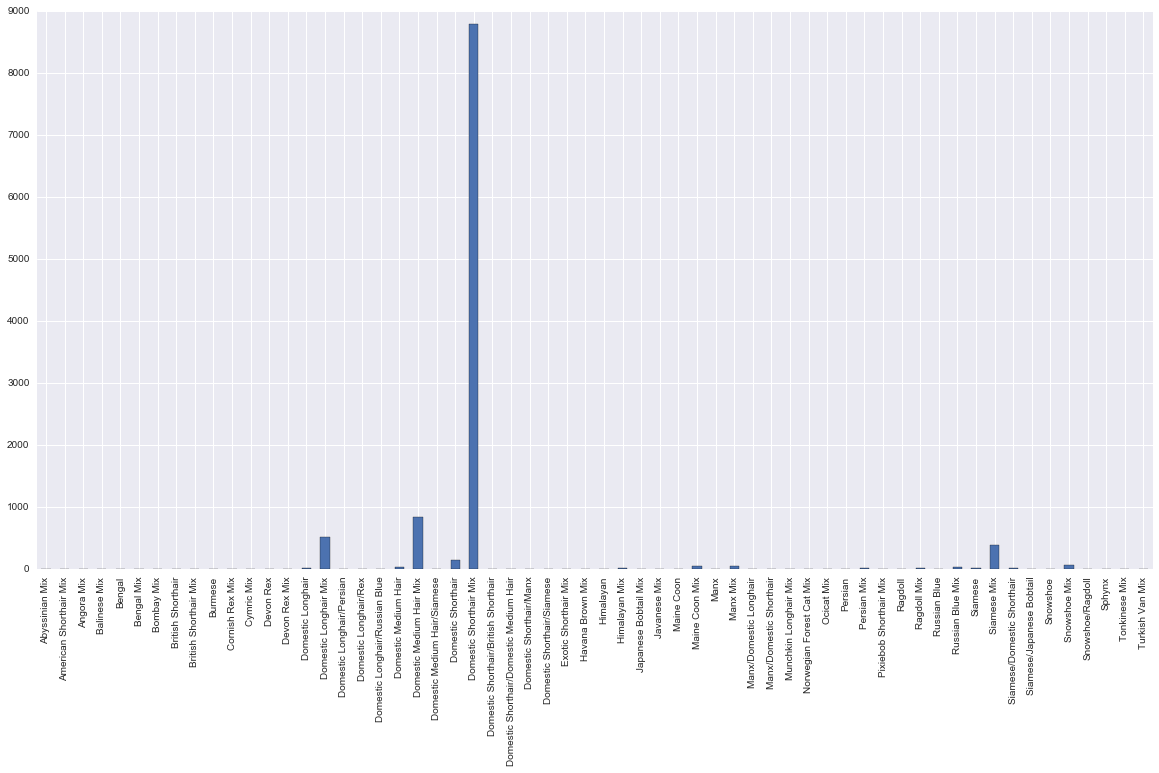

In [62]:
from collections import Counter
pd.Series(Counter(data[data['AnimalType'] == 'Cat']['Breed'].values)).plot(kind='bar',figsize=(20,10))

In [67]:
## The above figure implies that the number of cats from Domestic ShortHair Mix is the largest
## We can reduce the breeds to 5 as Domestic Longhair Mix, Domestic Shorthair Mix, Siamese etc.
cat_breeds = [i[0] for i in Counter(data[data['AnimalType'] == 'Cat']['Breed']).most_common(5)]
print cat_breeds

['Domestic Shorthair Mix', 'Domestic Medium Hair Mix', 'Domestic Longhair Mix', 'Siamese Mix', 'Domestic Shorthair']


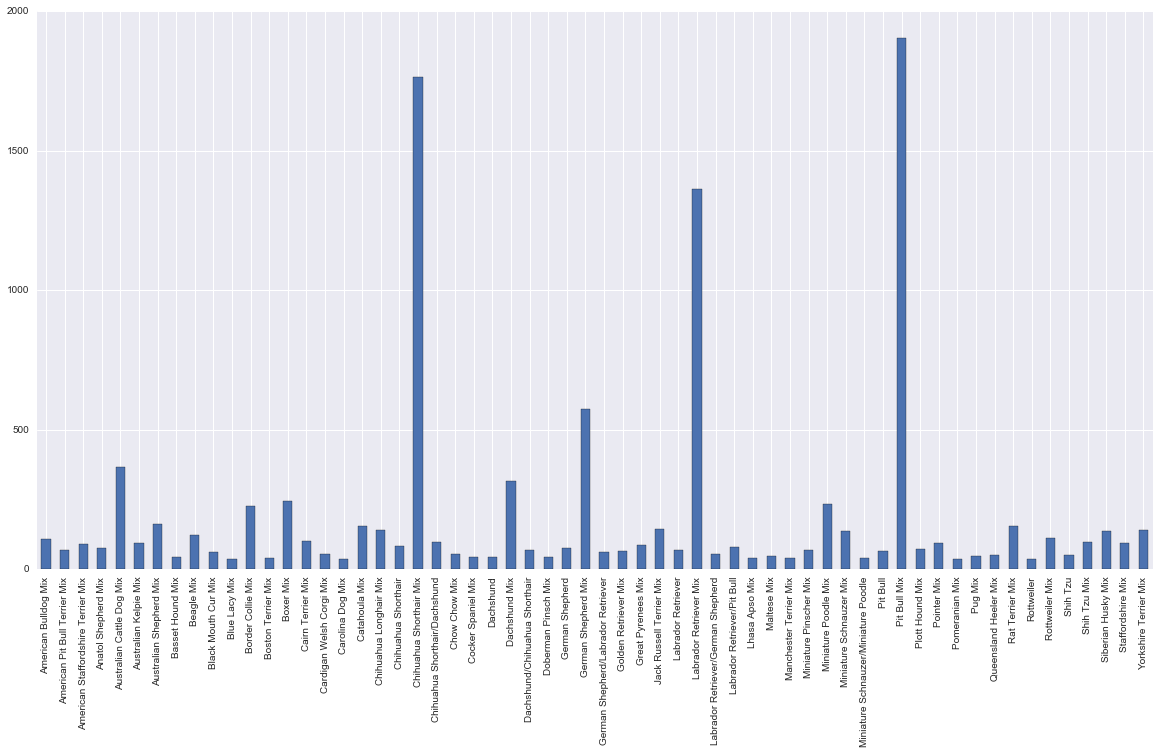

In [82]:
pd.Series({i[0]:i[1] for i in Counter(data[data['AnimalType'] == 'Dog']['Breed']).most_common(60)}).\
plot(kind='bar',figsize=(20,10))

In [149]:
breeds = {}
import string
with open('breeds.txt','rb') as fp:
    for line in fp:
        if line.startswith('-'):
            breed = line.strip().split(' ')[1]
            breeds[breed] = []
        else:
            word = ''
            for letter in list(line.strip()):
                if letter in string.punctuation or letter == '':
                    break
                word += letter
            breeds[breed].append(word)
breed['Cat'] = cat_breeds

In [125]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [144]:
def map_breed(x):
    if x in breeds['Cat']:
        return x
    else:
        for tag in breeds:
            for breed in breeds[tag]:
                if similar(breed,x) > 0.50:
                    return tag
        return 'Other'

In [158]:
## Applying the breed mapping on the breed column
data['Breed_map'] = map(map_breed,data['Breed'])

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26711 entries, A671945 to A706629
Data columns (total 11 columns):
Name              19038 non-null object
DateTime          26711 non-null object
OutcomeType       26711 non-null object
OutcomeSubtype    13099 non-null object
AnimalType        26711 non-null object
SexuponOutcome    26710 non-null object
AgeuponOutcome    26711 non-null object
Breed             26711 non-null object
Color             26711 non-null object
Color_map         26711 non-null object
Breed_map         26711 non-null object
dtypes: object(11)
memory usage: 2.4+ MB
